In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [123]:
!pip install imblearn

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [91]:
continuous = []
for column in df.columns:
    if df[column].dtypes != 'object':
        if df[column].nunique() >= 10:
            continuous.append(column)
           

continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [25]:
discrete = []
for column in df.columns:
    if df[column].dtypes != 'object':
        if df[column].nunique() < 10:
            discrete.append(column)
            
discrete.remove('target')          
discrete

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

<AxesSubplot:>

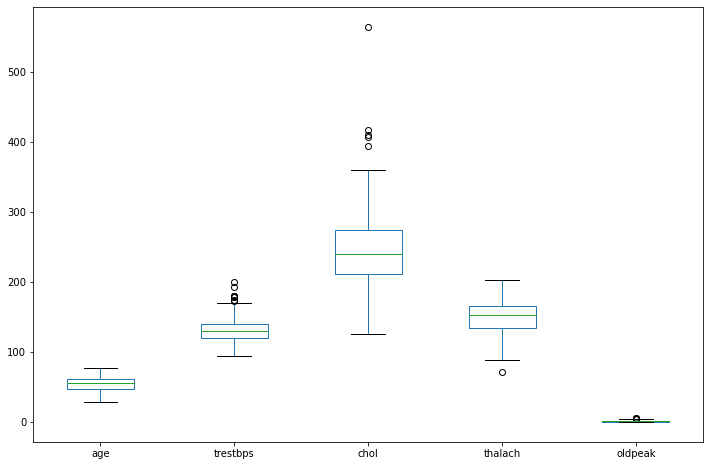

In [26]:
df[continuous].plot(kind = 'box', figsize = (12, 8))

In [27]:
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

<AxesSubplot:xlabel='trestbps'>

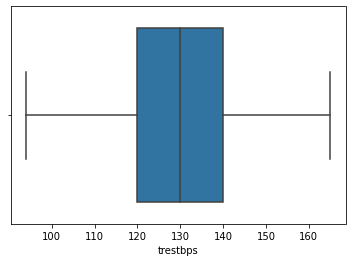

In [102]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.trestbps)

df = df.loc[(df.trestbps > lower) & (df.trestbps < upper)]

sns.boxplot(df.trestbps)

<AxesSubplot:xlabel='chol'>

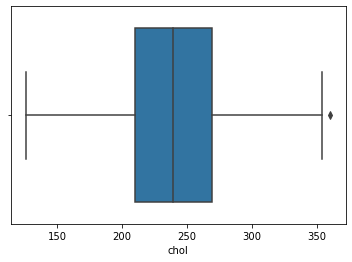

In [108]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.chol)

df = df.loc[(df.chol > lower) & (df.chol < upper)]

sns.boxplot(df.chol)

<AxesSubplot:xlabel='oldpeak'>

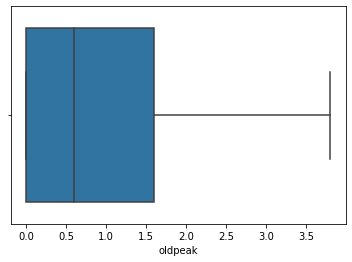

In [103]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.oldpeak)

df = df.loc[(df.oldpeak > lower) & (df.oldpeak < upper)]

sns.boxplot(df.oldpeak)

In [104]:
bin_df = df[['age']]
bin_df['age_bin'] = pd.cut(df['age'], bins=[0, 20, 50, 100],
                                       labels=["Young", "MidLife", "Old"])
bin_df.head()


,age,age_bin
0,63,Old
1,37,MidLife
2,41,MidLife
3,56,Old
4,57,Old


In [105]:
bin_df = df[['trestbps']]
bin_df['trestbps_bin'] = pd.cut(df['trestbps'], bins=[94, 120, 140, 165],
                                       labels=["Low", "Mid", "High"])
bin_df.head()

,trestbps,trestbps_bin
0,145,High
1,130,Mid
2,130,Mid
3,120,Low
4,120,Low


In [106]:
bin_df = df[['chol']]
bin_df['chol_bin'] = pd.cut(df['chol'], bins=[126, 210, 269, 360],
                                       labels=["Low", "Mid", "High"])
bin_df.head()

,chol,chol_bin
0,233,Mid
1,250,Mid
2,204,Low
3,236,Mid
4,354,High


In [111]:
bin_df = df[['thalach']]
bin_df['thalach_bin'] = pd.cut(df['thalach'], bins=[71, 132, 168, 202],
                                       labels=["Low", "Mid", "High"])
bin_df.head()

,thalach,thalach_bin
0,150,Mid
1,187,High
2,172,High
3,178,High
4,163,Mid


In [113]:
df_a = df

In [110]:
df_b = df

In [86]:
x_a = df_a.iloc[:, 1:-1]
y_a = df_a.iloc[:, -1]

In [118]:
from sklearn.model_selection import train_test_split

x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x_a, y_a, test_size=0.3, random_state=1)

from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')
target_onehot = onehot.fit_transform(x_a_train.age.to_numpy().reshape(-1,1))
target_onehot = pd.DataFrame(age_onehot, columns=onehot.get_feature_names(['age']))
target_onehot.head()

nominal = onehot.fit_transform(x_a_train[['age', 'trestbps', 'chol', 'thalach', 
                                             'oldpeak']])
df_nominal = pd.df(index=x_a_train.index, data=nominal, columns=onehot.get_feature_names(['age', 'trestbps', 'chol',
                                                                        'thalach', 'oldpeak']))
x_a_train = pd.concat([x_a_train, df_nominal], axis=1)
x_a_train.drop(columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], inplace=True)
x_a_train.shape


AttributeError: 'DataFrame' object has no attribute 'age'

In [133]:
X = df.drop(['target'],axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X,y)

from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

In [120]:
y_train.value_counts()

1    119
0     91
Name: target, dtype: int64

In [121]:
y.value_counts()

1    158
0    122
Name: target, dtype: int64

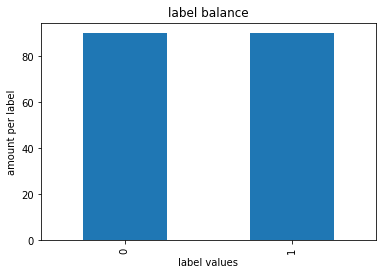

In [148]:
X_train_1, y_train_1 = make_imbalance(X_train, y_train, sampling_strategy={0: 90, 1: 90},random_state=14)

y_train_1.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [142]:

classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier()
}

In [150]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_train_1, y_train_1)
    train_score = round(classifier.score(x_train_1, y_train_1),2)
    train_scores.append(train_score)
    test_score = round(classifier.score(x_test, y_test),2)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

NameError: name 'x_train_1' is not defined